In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn import preprocessing

PATH = '/home/tbrownex/data/Hackett/JLP/UseCase2/'
FILE = 'BranchSalesDriver'
LOOPS = 200

In [24]:
cols = ["PPC Spend","Online Sales"]
df   = pd.read_csv(PATH+FILE, usecols=cols)

df = df.sort_values(by=['PPC Spend'])

ppc          = df["PPC Spend"]
onlineSales  = df["Online Sales"]

ppc   = np.array(ppc).reshape([-1,1])
os    = np.array(onlineSales).reshape([-1,1])
OSmean   = os.mean()
OSstd    = os.std()

In [25]:
output = open(PATH+"summary.csv", "w")
hdr = "a"+","+"b"+","+"method"+","+"Error"
hdr += "\n"
output.write(hdr)

17

In [26]:
# Optimizer likes data with values around 1 so scale using Zscore
ppcScaled = preprocessing.scale(ppc)
osScaled  = preprocessing.scale(os)

Before Scaling:
PPC  ranges from   240 -   611
Sales range from 3,393 - 7,448


After scaling
PPC  ranges from -1.80 - 3.18
Sales range from -1.94 - 3.23


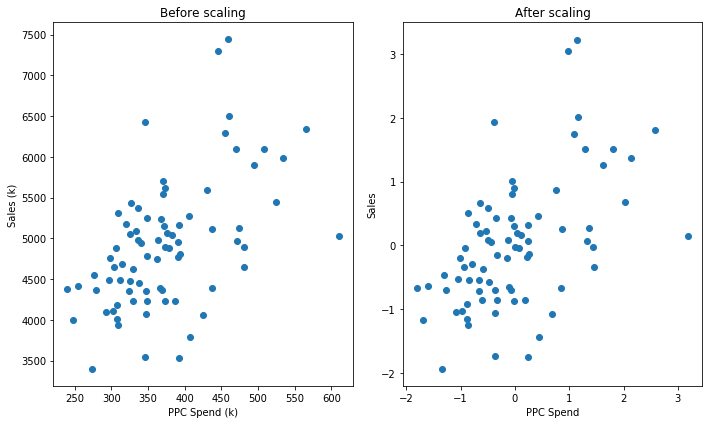

In [27]:
# Print the before and after scaling
print("Before Scaling:")
print("PPC  ranges from   {:,.0f} -   {:,.0f}".format(ppc.min()/1000, ppc.max()/1000))
print("Sales range from {:,.0f} - {:,.0f}".format(os.min()/1000, os.max()/1000))
print("\n")
print("After scaling")
print("PPC  ranges from {:,.2f} - {:,.2f}".format(ppcScaled.min(), ppcScaled.max()))
print("Sales range from {:,.2f} - {:,.2f}".format(osScaled.min(), osScaled.max()))

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.scatter(ppc/1000, os/1000)
plt.title("Before scaling")
plt.xlabel("PPC Spend (k)")
plt.ylabel("Sales (k)")

plt.subplot(1, 2, 2)
plt.title("After scaling")
plt.scatter(ppcScaled, osScaled)
plt.xlabel("PPC Spend")
plt.ylabel("Sales")

plt.tight_layout()
plt.show()

##### Fit the curve

In [28]:
# Define the curve-fitting function with parameters to be optimized
def lsq(parms):
    a = parms[0]
    b = parms[1]
    tmp = a*np.exp(b * ppcScaled) - osScaled
    return np.sum(tmp**2)

In [29]:
# Use the optimized parameters to generate Model values
# X is the ppc
def calcModelValues(model, X):
    a = model.x[0]
    b = model.x[1]
    Y = a*np.exp(b * X)
    # Unscale the model values for comparison to actual
    return Y*OSstd+OSmean

In [30]:
def calcError(modelVals, actuals):
    sumErrors = 0
    for idx in range(len(actuals)):
        sumErrors += np.square(modelVals[idx] - actuals[idx])
        return np.sqrt(sumErrors/len(actuals))

In [31]:
def writeResults(parms, meth, RMSE):
    rec = str(parms[0])+","+str(parms[1])+","+meth+","+str(int(RMSE))
    rec += "\n"
    output.write(rec)

In [32]:
for _ in range(LOOPS):
    a = np.random.normal()
    b = np.random.normal()
    parms = [a, b]
    meths = ["Nelder-Mead", "Powell", "CG", "BFGS", "L-BFGS-B", "TNC", \
             "COBYLA",  "SLSQP"]
    for meth in meths:
        model     = minimize(lsq, parms, method=meth)
        modelVals = calcModelValues(model, ppcScaled)
        RMSE      = calcError(modelVals, os)
        writeResults(parms, meth, RMSE[0])
output.close()

/home/tbrownex/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/home/tbrownex/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  
/home/tbrownex/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/home/tbrownex/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  
/home/tbrownex/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/home/tbrownex/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  
/home/tbrownex/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/home/tbrownex/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: ov

/home/tbrownex/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in multiply
  """
/home/tbrownex/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/home/tbrownex/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  
/home/tbrownex/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/home/tbrownex/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  
/home/tbrownex/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in multiply
  """
/home/tbrownex/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/home/tbrownex/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeW

/home/tbrownex/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  
/home/tbrownex/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/home/tbrownex/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/home/tbrownex/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  
/home/tbrownex/tensorflow/lib/python3.5/site-packages/scipy/optimize/optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/home/tbrownex/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  
/home/tbrownex/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/home/tbrownex/tensorflow/lib/p

In [44]:
#parms = [[-1.62077, 2.011712],[-1.297957549, 1.845145788]]
parms = [-1.109561541,-1.382577201]
meths = ["Powell"]
model     = minimize(lsq, parms, method=meth)
modelVals = calcModelValues(model, ppcScaled)
RMSE      = calcError(modelVals, os)

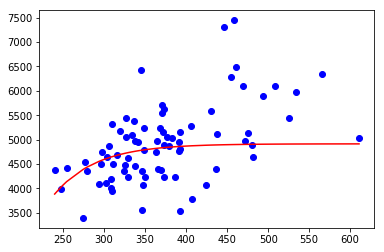

In [45]:
plt.scatter(ppc/1000, os/1000, color="b")
plt.plot(ppc/1000, modelVals/1000, color="r")
plt.show()

In [46]:
RMSE

array([56581.23657314])